My blog post is built into this notebook, I affectionately title it, "A Noobs Musings on Exploratory Analysis"

# Project 2
## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. 

You'll notice my "order of operations" is out of order...rookie move! I started cleaning before I explored the data. I now know cleaning before exploring could result in errors and/or wasted time.......

In [1]:
import pandas as pd

music00 = pd.read_csv ("../assets/billboard.csv")

Once I explored my data and figured out the question I wanted to ask, I made a to-do list for cleaning up my data. As I was generating items for my list I kept in mind three goals: clear communication, optimal format for calculations and project time constraints.

For example make it easier to type column and value names....


Cleaning Step 1: Remove Periods From Columns


In [2]:
# convert columns into a list
new_headers = list(music00.columns)
# list comprehension with.replace to remove periods.
new_headers = [col.replace(".", "") for col in new_headers]
#print new_headers

music00.columns = new_headers

Cleaning Step 2: Remove Xs From Columns

In [4]:
# convert columns into a list
new_headers2 = list(music00.columns)
# list comprehension with.replace to remove x.
new_headers2 = [col.replace("x", "") for col in new_headers]
#print new_headers2

music00.columns = new_headers2

Cleaning Step 3: Change Symbol to "Degrees" for 98 Degrees Artist


In [7]:
# find out how many times 98 degrees shows up
artist_inverted = music00["artistinverted"]

#so I can see full data set for count
#create dataframe
full_view = pd.DataFrame(pd.value_counts(artist_inverted))
# converts and saves to csv on your harddrive; use search spotlilght to find value to view; won't work for very large
#data sets.
full_view.to_csv("fullview.csv")

#there is only one instance of 98 degrees so, single replacement method works:
music00.ix[22,"artistinverted"] = "98 degrees"



##### Create a data dictionary for the data set. (ie: describe the variables of your dataset)

Rookie move number two!

Below is my data dictionary. 

Originally I thought a data dictionary was necessary only to provide a more detailed defintion of each value in the data set. After a little reasearch on the web, I learned that a data dictionary is a tool for increasing the efficiency of your analysis process. Here is an example of what one data scientist uses his data dictionary for: 

    * Identification of areas of sparsity and areas of concentration in high-dimensional data sets
    * Identification of outliers and data glitches
    * Getting a good sense of what the data contains, and where to spend time (or not) in further data mining

Click for the full article: http://www.analyticbridge.com/profiles/blogs/why-and-how-you-should-build-a-data-dictionary-for-big-data-sets

In [ ]:
data_list = []
enum_list = []
for i,h in enumerate(music00.columns):
    data_list.append(h)
    enum_list.append(i)

#print data_list

a = data_list[0:8]
b = enum_list[0:8]
#print a
#print b
    
    
# Data Dictionary 
data_dict = dict(zip(a,b))
#print data_dict

#updating dictionary keys-faster way to do this?
data_dict["date_peaked"] = data_dict.pop('date.peaked')
data_dict["artist"] = data_dict.pop('artist.inverted')
data_dict["date_entered"] = data_dict.pop('date.entered')
data_dict["number_week"] = data_dict.pop('x1st.week')

# re-defining keys-faster way to do this?
data_dict["date_entered"] = "date song first appeared on the chart"
data_dict["date_peaked"]= "date song was at its highest point on the chart"
data_dict["artist"]= "artist who made song"
data_dict["track"]= "name of song"
data_dict["number_week"]= "song rank on chart for given week eg 24th week"
data_dict["year"]= "year song was on the chart" 
data_dict["time"]= "length of song"
data_dict["genre"]= "genre of music eg rock or rap"

#print data_dict


## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [8]:
# shape of data
music00.shape

#There are 317 tracks (rows) and 83 columns

(317, 83)

In [9]:
#What are our column headings?
music00.columns

Index([u'year', u'artistinverted', u'track', u'time', u'genre', u'dateentered',
       u'datepeaked', u'1stweek', u'2ndweek', u'3rdweek', u'4thweek',
       u'5thweek', u'6thweek', u'7thweek', u'8thweek', u'9thweek', u'10thweek',
       u'11thweek', u'12thweek', u'13thwek', u'14thweek', u'15thweek',
       u'16thweek', u'17thweek', u'18thweek', u'19thweek', u'20thweek',
       u'21stweek', u'22ndweek', u'23rdweek', u'24thweek', u'25thweek',
       u'26thweek', u'27thweek', u'28thweek', u'29thweek', u'30thweek',
       u'31stweek', u'32ndweek', u'33rdweek', u'34thweek', u'35thweek',
       u'36thweek', u'37thweek', u'38thweek', u'39thweek', u'40thweek',
       u'41stweek', u'42ndweek', u'43rdweek', u'44thweek', u'45thweek',
       u'46thweek', u'47thweek', u'48thweek', u'49thweek', u'50thweek',
       u'51stweek', u'52ndweek', u'53rdweek', u'54thweek', u'55thweek',
       u'56thweek', u'57thweek', u'58thweek', u'59thweek', u'60thweek',
       u'61stweek', u'62ndweek', u'63rdweek', u'64t

Describing muliple columns to get more information....

In [10]:
music00['year'].describe()
# data is only for the year 2000

count     317.0
mean     2000.0
std         0.0
min      2000.0
25%      2000.0
50%      2000.0
75%      2000.0
max      2000.0
Name: year, dtype: float64

In [11]:
music00['artistinverted'].describe()
#there are 228 artists in the dataset
# Jay-Z has the most tracks in the dataset

count       317
unique      228
top       Jay-Z
freq          5
Name: artistinverted, dtype: object

In [ ]:
#verification that.descibe is indeed giving me what I thought it was.
# Jay-Z has the most tracks in the dataset
music00['artistinverted'].value_counts()

In [ ]:
#verification that.descibe is indeed giving me what I thought it was.
#there are 228 artists in the dataset
a = music00['artistinverted'].unique()
len(a)

In [14]:
# describe tracks
music00['track'].describe()

#316 unique tracks
# two songs have the same name but they are by diff artists
#; Where I Wanna Be



count                  317
unique                 316
top       Where I Wanna Be
freq                     2
Name: track, dtype: object

In [15]:
# used mask to find the tracks that had the same name
mask = music00["track"] == "Where I Wanna Be"
music00[mask]

,year,artistinverted,track,time,genre,dateentered,datepeaked,1stweek,2ndweek,3rdweek,...,67thweek,68thweek,69thweek,70thweek,71stweek,72ndweek,73rdweek,74thweek,75thweek,76thweek
118,2000,"Jones, Donell",Where I Wanna Be,6:22,Rock,2000-04-22,2000-07-08,81,71.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,2000,"Sheist, Shade",Where I Wanna Be,4:16,Rap,2000-11-11,2000-11-18,96,95.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#proper classification?

dmask = music00["artistinverted"] == "Destiny's Child"
music00[dmask]

,year,artistinverted,track,time,genre,dateentered,datepeaked,1stweek,2ndweek,3rdweek,...,67thweek,68thweek,69thweek,70thweek,71stweek,72ndweek,73rdweek,74thweek,75thweek,76thweek
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2000,Destiny's Child,Jumpin' Jumpin',3:48,Rock,2000-05-13,2000-08-19,74,71.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#descibe time column
music00['time'].describe()

# 126 unique song lenghts
# most common length 3 minutes and 50 seconds; shows up 9 times

count      317
unique     126
top       3:50
freq         9
Name: time, dtype: object

In [ ]:
#descibe genre
music00['genre'].describe()


# 11 genres
# rock most popular genre; shows up 137 times

Right about here I got smart and realized I could have saved myself some time by writing a function and passing column names as arguments...

In [18]:
def describe(x):
    a = music00[x].describe()
    return a

describe("genre")

count      317
unique      11
top       Rock
freq       137
Name: genre, dtype: object

In [26]:
#genre types
music00['genre'].unique()

array(['Rock', 'Latin', 'Country', 'Rap', 'Pop', 'Electronica', 'Jazz',
       'R&B', 'Reggae', 'Gospel'], dtype=object)

In [25]:
#merge R&B genres
music00.genre.replace('R&B\n','R&B', inplace=True)
gen = music00['genre'].unique().tolist()

In [19]:
describe("dateentered")

# 68 unique entry dates
#many songs entered the top one hundred on January 29th

count            317
unique            68
top       2000-01-29
freq              11
Name: dateentered, dtype: object

In [20]:
describe("datepeaked")

# 53 unique peak dates
#many songs peaked on December 12/2/200; 17 

count            316
unique            53
top       2000-12-02
freq              17
Name: datepeaked, dtype: object

##### Write a brief description of your data, and any interesting observations you've made thus far. 

Billboard chart data provides us with information about the most popular tracks released in the year 2000. Here are some highlights:

 * 228 artists and their 317 songs made it the top 100
 * There are 126 unique song lenghts. On average the length of song in the top 100 is 3 minutes and 50  
   seconds
 * There are 11 unique genres and we headbangers just love rock
 * The artist Jay-Z had the most tracks on the chart with a total of 5 
 * There are 68 unique entry dates but on average most tracks entered the top one hundred on January 29th,2000
 * There are 53 unique peak dates but on average tracks peaked on December 2,2000 
 * Average ranking of a track in it's first week in the top 100 is 80
 
Observation of Concern?:
The artist Destiny's Child is classified in the rock genre but shouldn't they be in the Pop genre? 
If our artists are not properly classified could be drawing improper conclusions?
https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=destiny%27s%20child%20genre
Explore other genre datasets?

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [28]:
prep = list(music00.columns)
weeks = prep[7:]
#weeks

In [29]:
melted_00 = pd.melt(music00, id_vars=["artistinverted",'track'], value_vars =weeks, var_name = "Weeks", value_name = "Ranking")
del melted_00["Weeks"]

## Step 3: Visualize your data.

##### Using a plotting utility of your choice, create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

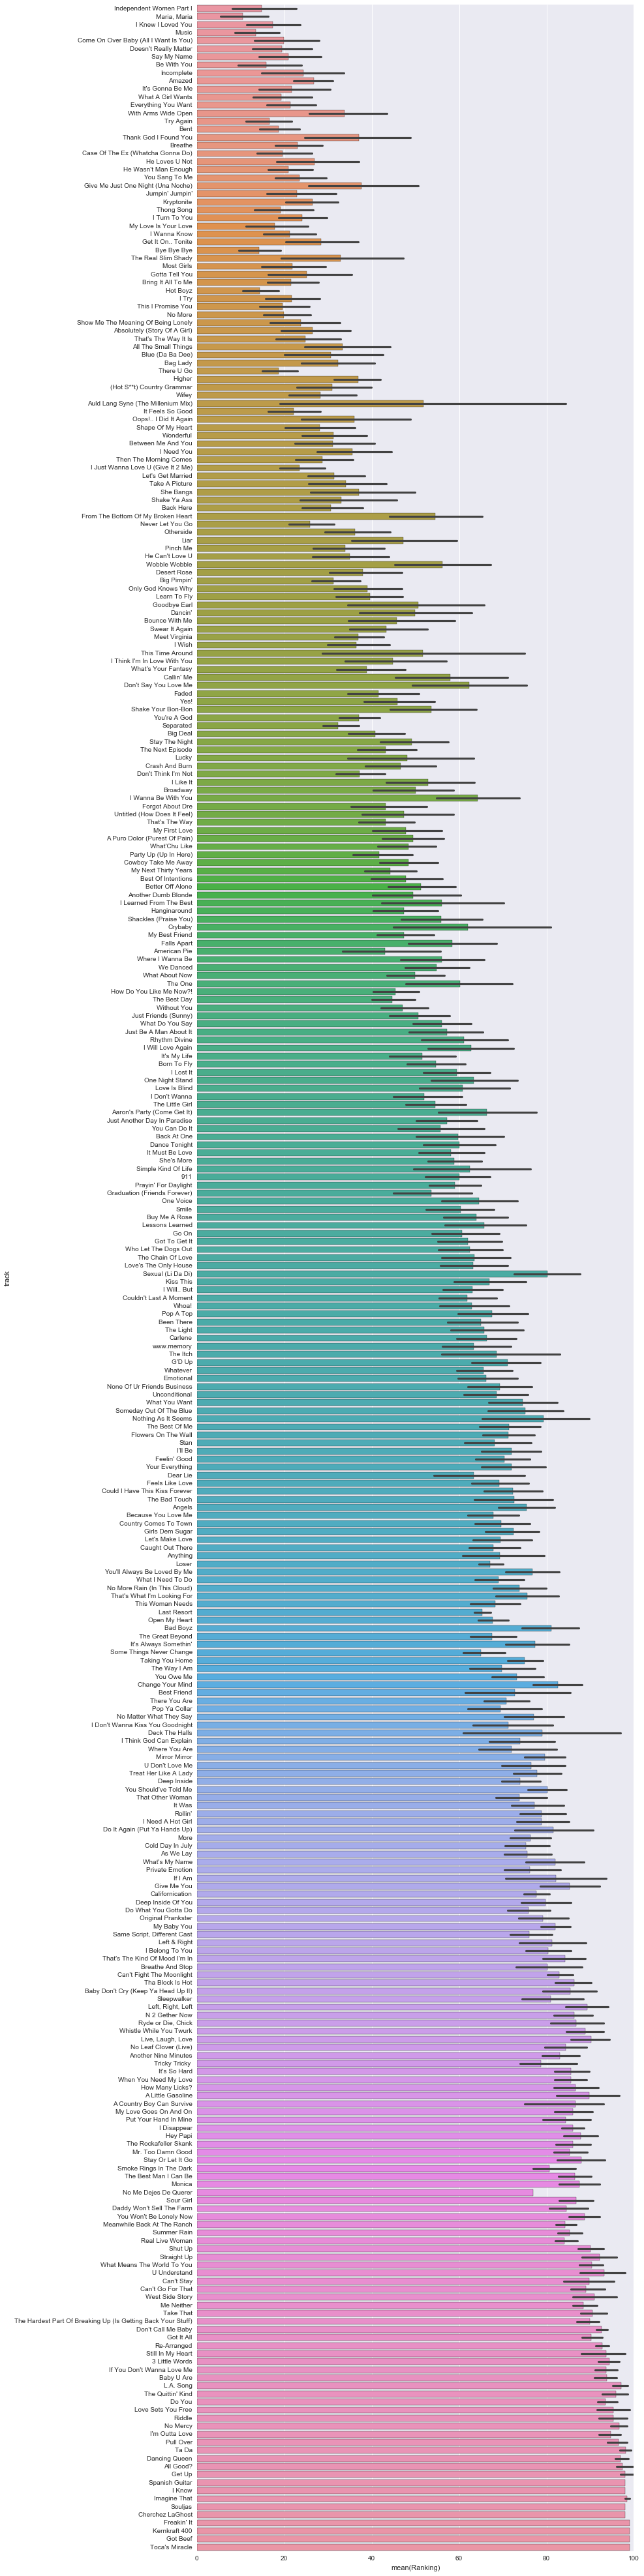

In [31]:
#Most popular track of 2000
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set(rc={'figure.figsize':(12,70)})
top_song = sns.barplot(x = 'Ranking', y = 'track', data = melted_00)

/Users/ltdanp21/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


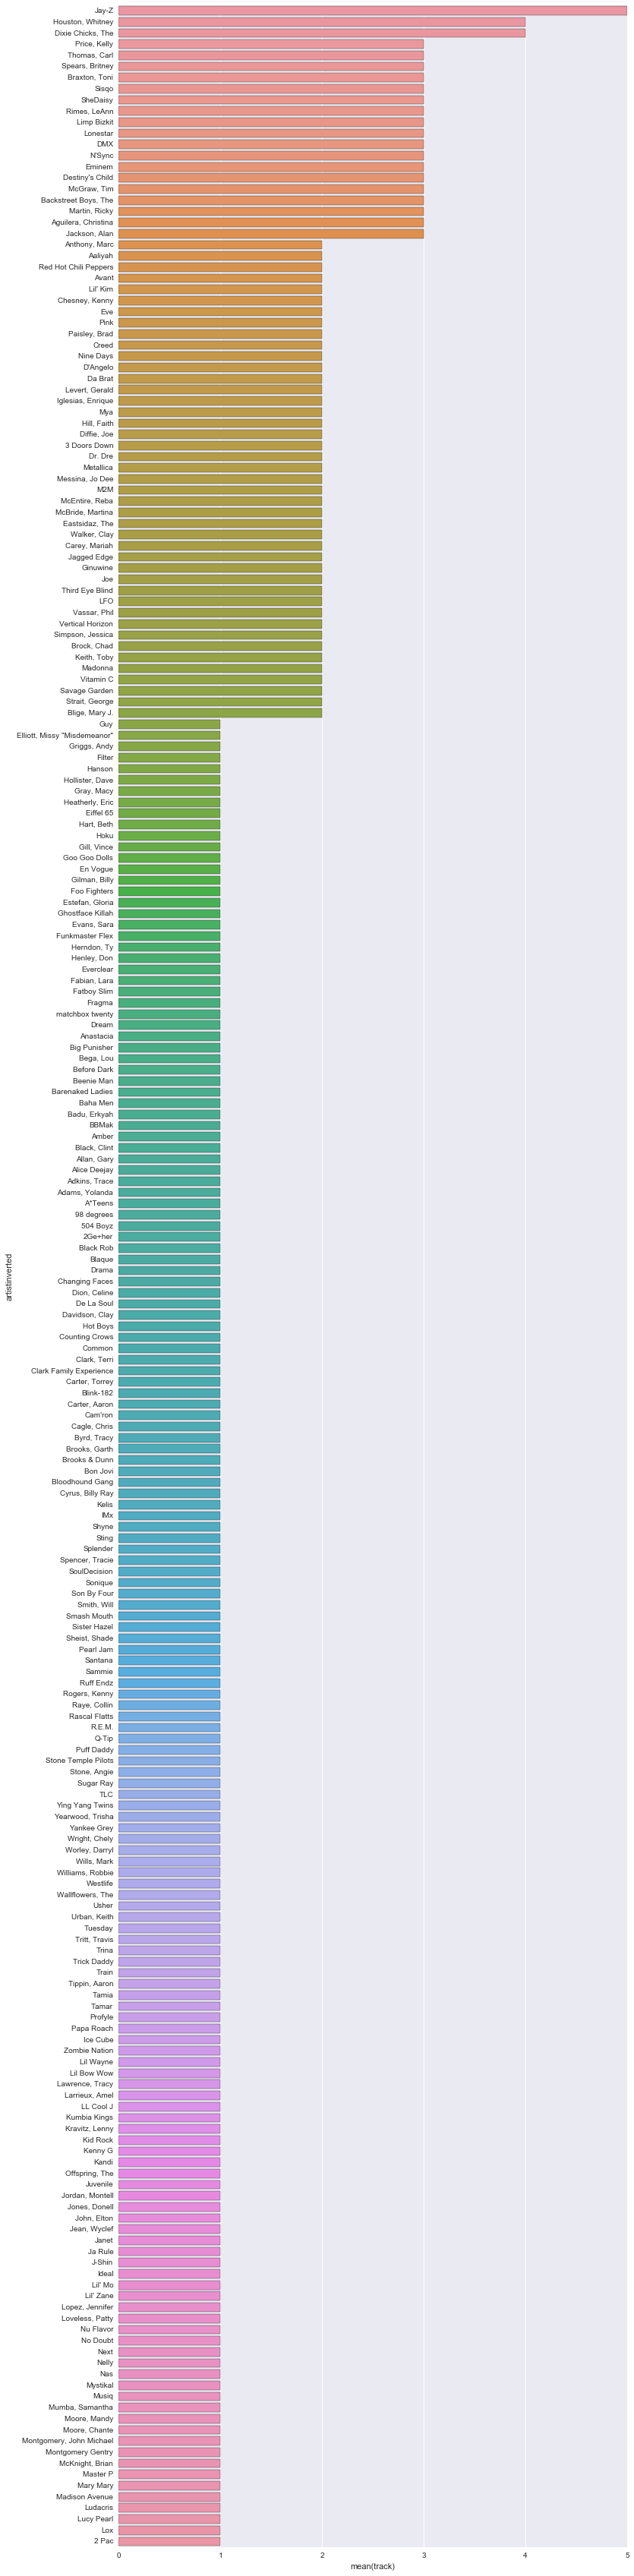

In [34]:
#Artist with most tracks on the chart 
most_tracks = music00.groupby(["artistinverted"])['track'].count().order(ascending=False)
most_tracks = pd.DataFrame(most_tracks)
#print type(most_tracks)

most_tracks = most_tracks.reset_index()

sns.set(rc={'figure.figsize':(12,60)})
plot1 = sns.barplot(x = 'track', y = 'artistinverted', data = most_tracks)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1218b9fd0>]], dtype=object)

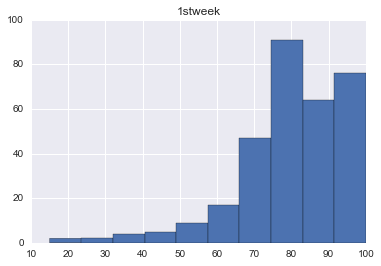

In [37]:
#Average rank of track for the first week in the top 100
import matplotlib.pyplot as plt
%matplotlib inline

music00.hist('1stweek')

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

I recognize that I am not getting to the "why" with the hypothesis below. Given my current skill set and the time constraints, my goal with this project is to convey that I am starting to grasp the cleaning, exploration, and hyothesis forming/testing process. Had I more time, I would have tested the hypothesis that tracks that made it to 1st place shared a similar song structure (beats per minute) and theme (e.g. songs about love).

Bayesian Hypothesis:
Jay-Z has the most tracks on the Billboard chart and therefore will have the most popular song of the year 2000

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

I will test my hypothesis by determing which track had the highest average ranking:

* plot a count of the number of times an artist had a track on the chart
* barplot of tracks and an average of rankings

If a Jay-Z track had the highest average ranking then the hypothesis will be accepted.



## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for roughly 800-1,000 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 600 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 